In [1]:
suppressPackageStartupMessages(library(tidyverse))
library(RforHDSdata)
library(patchwork)
data(pain)

# sampling data
set.seed(5)
pain_df <- pain[complete.cases(subset(pain, select=-c(PAIN_INTENSITY_AVERAGE.FOLLOW_UP))), ]
pain_df <- pain_df[sample(1:nrow(pain_df), 5000, replace=FALSE),] 

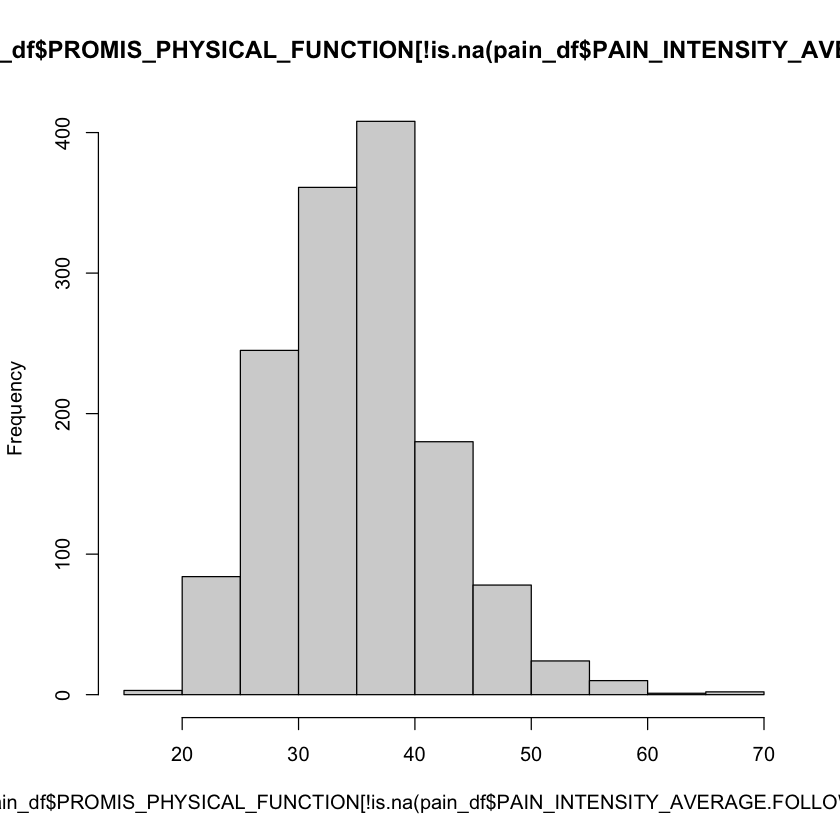

In [2]:
hist(pain_df$PROMIS_PHYSICAL_FUNCTION[!is.na(pain_df$PAIN_INTENSITY_AVERAGE.FOLLOW_UP)])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


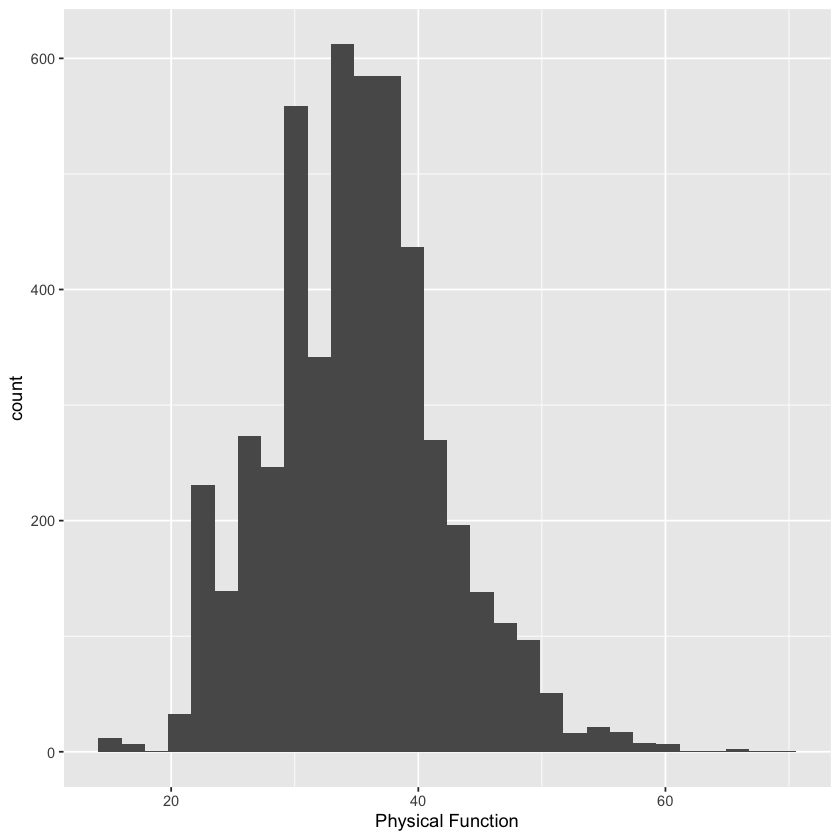

In [5]:
ggplot(pain_df) + 
  geom_histogram(aes(x=PROMIS_PHYSICAL_FUNCTION)) + 
  labs(x="Physical Function")

Warning message:
“Removed 3604 rows containing missing values (`geom_point()`).”


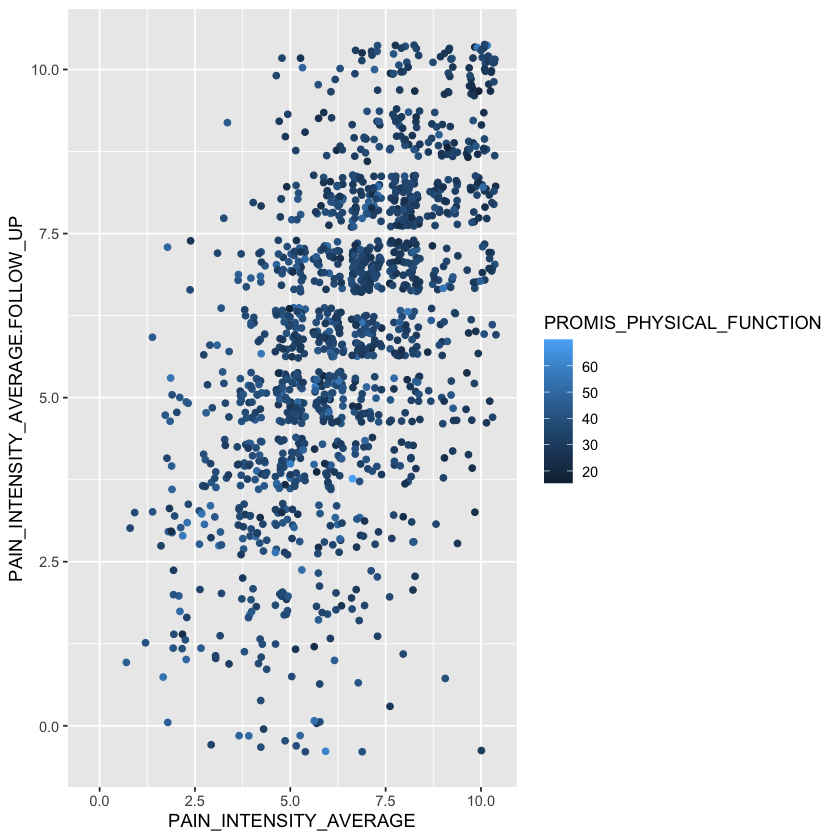

In [8]:
ggplot(pain_df) + 
  geom_point(aes(x=PAIN_INTENSITY_AVERAGE, y= PAIN_INTENSITY_AVERAGE.FOLLOW_UP, 
                color = PROMIS_PHYSICAL_FUNCTION), position="jitter")

In [12]:
pain_phys <- pain_df %>% 
  group_by(PAIN_INTENSITY_AVERAGE, PAIN_INTENSITY_AVERAGE.FOLLOW_UP) %>%
  summarize(num_pat = n(), mean_phys = mean(PROMIS_PHYSICAL_FUNCTION, na.rm=TRUE)) %>%
  na.omit() %>%
  ungroup()
head(pain_phys)

`summarise()` has grouped output by 'PAIN_INTENSITY_AVERAGE'. You can override
using the `.groups` argument.


PAIN_INTENSITY_AVERAGE,PAIN_INTENSITY_AVERAGE.FOLLOW_UP,num_pat,mean_phys
<dbl>,<dbl>,<int>,<dbl>
1,1,2,43.37500
1,3,3,38.08333
1,6,1,43.97000
2,0,1,46.84000
2,1,7,41.04000
2,2,5,40.58800


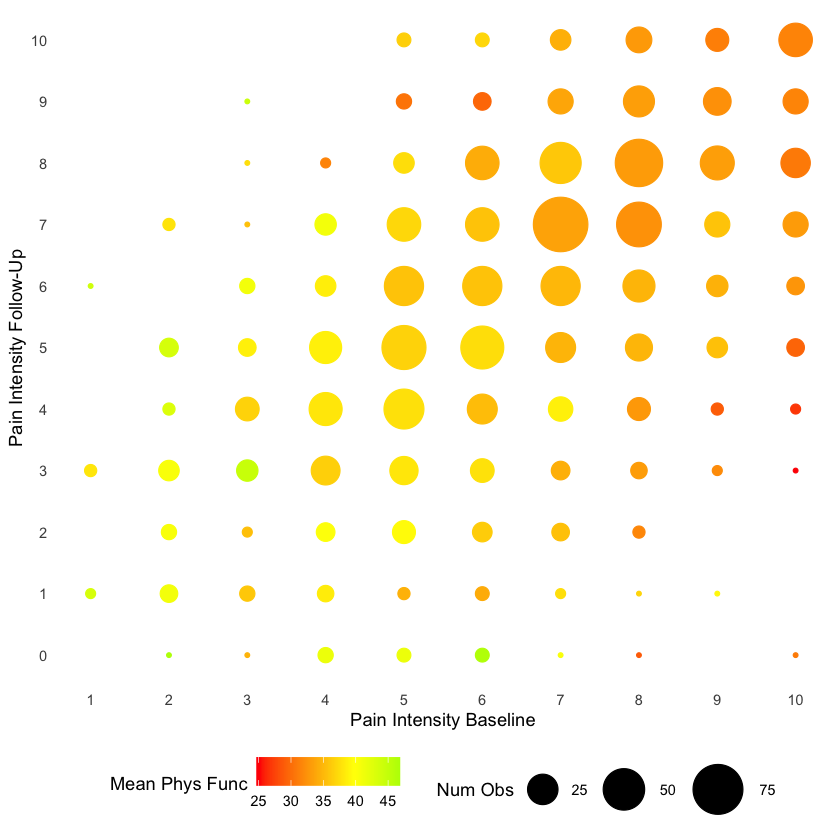

In [25]:
p1 <- ggplot(pain_phys) +
  geom_point(aes(x=PAIN_INTENSITY_AVERAGE, y= PAIN_INTENSITY_AVERAGE.FOLLOW_UP, 
                color = mean_phys, size = num_pat)) + 
  labs(x="Pain Intensity Baseline", y= "Pain Intensity Follow-Up") + 
  scale_size_continuous(range=c(1,15), name="Num Obs") + 
  scale_x_continuous(breaks=seq(0,10,1)) + 
  scale_y_continuous(breaks=seq(0,10,1)) +
  scale_color_gradient2(low="red", mid="yellow", high="green", name="Mean Phys Func", midpoint=40) + 
  theme_minimal() +
  theme(legend.position="bottom", panel.grid = element_blank())
p1

In [27]:
ggsave("myplot.png", p1)

Saving 7 x 7 in image


In [26]:
?ggsave